In [1]:
#from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import cv2 as cv
import glob

# for reading and displaying imagesoo
from skimage.io import imread
from PIL import Image, ImageOps
from skimage.transform import resize

import tensorflow as tf
import cv2
import scipy.ndimage as nd
from keras.layers import Layer
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras import Sequential
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
import os
#from noise_generator import noise_generator_phase
from scipy.io import savemat
#from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras import backend as K
%matplotlib inline


# Prepering Dataset

In [2]:
dim = 64
imageface_files = glob.glob(r'D:\1-srttu\Pattern Recognition\Dataset\main data set\chest_xray\train\NORMAL\*')
im_cv = []
label = []
for p in imageface_files:
    n = Image.open(p)
    n = ImageOps.grayscale(n)
    n = n.resize((dim,dim))
    numpydata = np.asarray(n)
    label.append(np.array([1]))
    im_cv.append(numpydata)        #print (self.data)


imagemotor_files = glob.glob(r'D:\1-srttu\Pattern Recognition\Dataset\main data set\chest_xray\train\PNEUMONIA\*')
for p in imagemotor_files:
    n = Image.open(p)
    n = ImageOps.grayscale(n)
    n = n.resize((dim,dim))
    numpydata = np.asarray(n)
    label.append(np.array([0]))
    im_cv.append(numpydata)
        

In [3]:
dim = 64
imageface_files = glob.glob(r'D:\1-srttu\Pattern Recognition\Dataset\main data set\chest_xray\test\NORMAL\*')
im_cv_test = []
label_test = []
for p in imageface_files:
    n = Image.open(p)
    n = n.resize((dim,dim))
    numpydata = np.asarray(n)
    #print(numpydata.shape)

    label_test.append(np.array([1]))
    im_cv_test.append(numpydata)        #print (self.data)


imagemotor_files = glob.glob(r'D:\1-srttu\Pattern Recognition\Dataset\main data set\chest_xray\test\PNEUMONIA\*')
for p in imagemotor_files:
    n = Image.open(p)
    n = n.resize((dim,dim))
    numpydata = np.asarray(n)
    #print(numpydata.shape)
    label_test.append(np.array([0]))
    im_cv_test.append(numpydata)

In [ ]:
dim = 64
imageface_files = glob.glob(r'D:\1-srttu\Pattern Recognition\Dataset\main data set\chest_xray\val\NORMAL\*')
im_cv_val = []
label_val = []
for p in imageface_files:
    n = Image.open(p)
    n = n.resize((dim,dim))
    numpydata = np.asarray(n)
    #print(numpydata.shape)

    label_val.append(np.array([1]))
    im_cv_val.append(numpydata)        #print (self.data)


imagemotor_files = glob.glob(r'D:\1-srttu\Pattern Recognition\Dataset\main data set\chest_xray\val\PNEUMONIA\*')
for p in imagemotor_files:
    n = Image.open(p)
    n = n.resize((dim,dim))
    numpydata = np.asarray(n)
    #print(numpydata.shape)
    label_val.append(np.array([0]))
    im_cv_val.append(numpydata)

In [6]:
testing_set = np.asarray(im_cv_test)
label_test = np.asarray(label_test)

In [7]:
training_set = np.asarray(im_cv)
label_training = np.asarray(label).reshape(-1)

In [ ]:
val_set = np.asarray(im_cv_val)
label_val = np.asarray(label_val).reshape(-1)

In [8]:
n = training_set[label_training==1].copy()
n.shape

(1341, 64, 64)

In [9]:
p = training_set[label_training==0].copy()

In [10]:
#del training_set
size = n.shape
training_set = np.vstack((n,p[:size[0]]))

In [11]:
training_set.shape

(2682, 64, 64)

In [12]:
del n, p

 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [13]:
training_set = training_set.reshape(training_set.shape[0],64,64,1)
label_training = label_training[:training_set.shape[0]].copy()

In [14]:
label_training[label_training==0].shape

(1341,)

In [15]:
testing_set = testing_set.reshape(testing_set.shape[0],64,64,1)

In [16]:
label_test.shape

(624, 1)

In [17]:
testing_set.shape

(624, 64, 64, 1)

In [18]:
datagen = ImageDataGenerator(rescale = 1./255., validation_split=0.25, rotation_range=20,
                             width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True,
                             zoom_range=0.2, shear_range=0.2, fill_mode="nearest")

In [19]:
train_generator=datagen.flow(
training_set,
label_training,
batch_size=32)

In [20]:
val_gen = datagen.flow(
testing_set,
label_test,
batch_size=32)

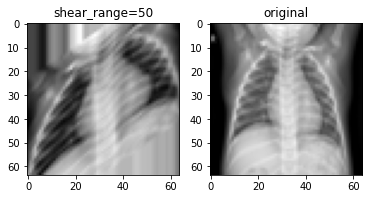

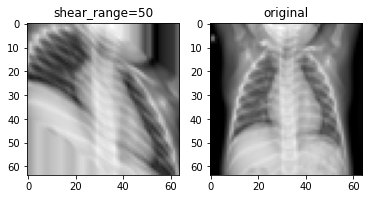

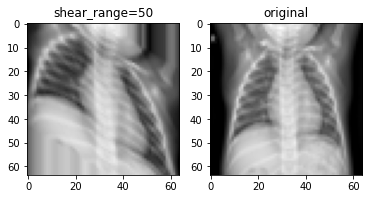

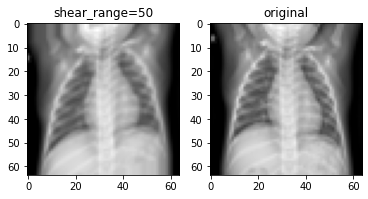

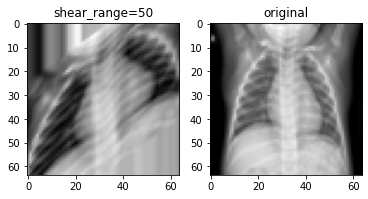

In [109]:
#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
#image = np.zeros((1,64,64,1))
# generate batch of images
for i in range(5):
    # convert to unsigned integers for viewing
    image = next(train_generator)[0].astype('uint8')
    # plot image
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image, cmap='gray')
    plt.title('shear_range=50')
    plt.subplot(1,2,2)
    plt.imshow(training_set[2], cmap='gray')
    plt.title('original')
plt.show()

In [24]:
def make_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 1)))
    model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))
    model.add(MaxPool2D((3, 3), padding='same', strides=(3, 3)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (2, 2), padding='valid', activation='relu'))
    model.add(MaxPool2D((2, 2), padding='same', strides=(2, 2)))
    model.add(Dropout(0.2))
    
    #model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    #model.add(MaxPool2D((8, 8), padding='same', strides=(8, 8)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) 
    #model.add(RBFLayer(256, 0.5))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    #model.add(RBFLayer(512, 0.5))
    model.add(Dense(1, activation='sigmoid'))

    print(model.summary())
    return model

In [26]:
# defining the model
model = make_model()
acc2 =[]
val_acc2 =[]
val_loss2=[]
loss2=[]
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])
for epochs in range(0,20):
    print('epoch' , epochs)
    history = model.fit(x=training_set,y=label_training, batch_size = 32)
    #model.save('model_chestwithgen_withRBF_epoch' + str(epochs) + '.h5py')
    acc2.append(history.history['acc'])
    val_acc2.append(history.history['val_acc'])
    loss2.append(history.history['loss']) 
    val_loss2.append(history.history['val_loss']) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)      

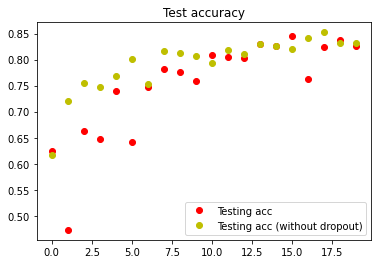

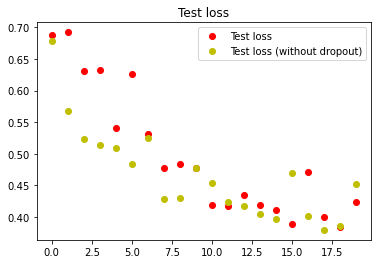

In [27]:
epochs = np.arange(20)
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.plot(epochs, acc2, 'go', label='Training acc  (without dropout)')
plt.plot(epochs, val_acc2, 'yo', label='Validation acc (without dropout)')
plt.title('training and validation accuracy')
plt.legend()
plt.show()
    
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.plot(epochs, loss2, 'go', label='Training loss (without dropout)')
plt.plot(epochs, val_loss2, 'yo', label='Validation loss (without dropout)')
plt.title('training and validation loss')
plt.legend()
plt.show()


In [110]:
model = make_model()
model=keras.models.load_model('model_chestwithgen_epoch19.h5py')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

In [3]:
model = make_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

In [118]:
testing_set = testing_set.reshape(testing_set.shape[0],64,64,1)
pred = model.predict(testing_set)
#pred = np.argmax(pred, axis=1)
acc = np.zeros(pred.shape[0])
acc = (pred > 0.5)*1
per = 0
for i in range(acc.shape[0]):
    if acc[i] == label_test[i]:
        per += 1
per/acc.shape[0]

0.7948717948717948

In [122]:
get_15rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[8].output])
layer_output= get_15rd_layer_output(testing_set)[0]


In [124]:
np.save('outtest_conv_justflatted.npy', layer_output)
#y = to_categorical (label_training, 2)
#np.save('train_label.npy', y)

In [20]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [15]:
max_pool_1d = tf.keras.layers.GlobalMaxPooling2D()
layer_output = max_pool_1d(layer_output)
layer_output.shape

TensorShape([2682, 128])